In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
import zipfile
import os

with zipfile.ZipFile('spotify.zip', 'r') as zip_ref:
    zip_ref.extractall('spotify_data')


In [3]:
import os
os.listdir('spotify_data')

['spotify-2023.csv']

In [4]:
spotify_data = pd.read_csv('spotify_data/spotify-2023.csv', encoding='latin1')
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [8]:
spotify_data.shape

(953, 24)

In [9]:
spotify_data.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


I label encoded the name of the track

In [10]:
#encoded the track_name
track_encoder = LabelEncoder()
spotify_data['track_name_encoded'] = track_encoder.fit_transform(spotify_data['track_name'])
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,687
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,397
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,936
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,170
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,864


I label encoded the artist name by making each individual artist an prime number and then each if there is a song of collab I made the artist encoding to be the product of the artist encoding. Because this will grow the number really big I normalized it by logging the artist encoding after the product. I also added a row for number of artist.

In [11]:
from sympy import primerange

In [12]:
#artist == prime number, if a song have multiple artist, encode ==> product of the prime
spotify_data['artist_list'] = spotify_data['artist(s)_name'].str.split(', ')

unique_artists = sorted({artist for sublist in spotify_data['artist_list'] for artist in sublist})
primes = list(primerange(2, 2 + len(unique_artists)))  # Generate enough primes
artist_prime_mapping = dict(zip(unique_artists, primes))

In [13]:
# Ensure unique_artists and artist_prime_mapping are dynamically updated
unique_artists = sorted({artist for sublist in spotify_data['artist_list'] for artist in sublist})
primes = list(primerange(2, 2 + len(unique_artists)))
artist_prime_mapping = dict(zip(unique_artists, primes))

# Function to handle missing artists
def get_artist_prime(artist):
    if artist not in artist_prime_mapping:
        # Dynamically assign a new prime number
        next_prime = max(artist_prime_mapping.values()) + 1
        while not all(next_prime % p != 0 for p in range(2, int(next_prime**0.5) + 1)):
            next_prime += 1
        artist_prime_mapping[artist] = next_prime
    return artist_prime_mapping[artist]

# Map primes and calculate the product
spotify_data['artist_primes'] = spotify_data['artist_list'].apply(
    lambda artists: [get_artist_prime(artist) for artist in artists]
)
spotify_data['artist_prime_product'] = spotify_data['artist_primes'].apply(
    lambda primes: eval('*'.join(map(str, primes)))
)

spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist_list,artist_primes,artist_prime_product
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,89,83,31,0,8,4,687,"[Latto, Jung Kook]","[701, 709]",497009
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,61,74,7,0,10,4,397,[Myke Towers],[719],719
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,32,53,17,0,31,6,936,[Olivia Rodrigo],[727],727
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,58,72,11,0,11,15,170,[Taylor Swift],[733],733
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,23,80,14,63,11,6,864,[Bad Bunny],[337],337


In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [17]:
spotify_data['artist_prime_product'] = spotify_data['artist_prime_product'].astype(float)
spotify_data['artist_prime_product'] = spotify_data['artist_prime_product'].apply(np.log)

In [18]:
filtered_df = spotify_data[spotify_data['artist(s)_name'].str.contains('Jung Kook', case=False, na=False)]
filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist_list,artist_primes,artist_prime_product
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,89,83,31,0,8,4,687,"[Latto, Jung Kook]","[701, 709]",2.573861
62,Left and Right (Feat. Jung Kook of BTS),"Charlie Puth, BTS, Jung Kook",3,2022,6,24,3107,39,720434240,38,...,72,59,62,0,9,3,423,"[Charlie Puth, BTS, Jung Kook]","[647, 293, 709]",2.929399
94,Still With You,Jung Kook,1,2020,6,5,31,39,38411956,2,...,34,47,9,0,83,4,748,[Jung Kook],[709],1.881578
396,Dreamers [Music from the FIFA World Cup Qatar ...,"BTS, Jung Kook, FIFA Sound",3,2022,11,20,889,20,323358833,11,...,34,88,16,0,44,4,222,"[BTS, Jung Kook, FIFA Sound]","[293, 709, 2797]",3.004708
650,Stay Alive (Prod. SUGA of BTS),Jung Kook,1,2022,2,11,590,5,246376690,4,...,50,76,30,0,10,7,741,[Jung Kook],[709],1.881578


In [19]:
#find the dupe rows that have the same artist(s)_name and track_name
duplicate_rows = spotify_data[spotify_data.duplicated(subset=['artist(s)_name', 'track_name'], keep=False)]
duplicate_rows

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist_list,artist_primes,artist_prime_product
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,53,64,11,0,45,6,656,[Rosa Linn],[1733],2.009235
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,65,79,5,2,11,6,660,[ThxSoMch],[2621],2.063225
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,72,74,10,0,34,7,22,[Lizzo],[2707],2.067318
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,57,57,9,20,11,7,660,[ThxSoMch],[2621],2.063225
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,35,77,1,0,26,4,783,[The Weeknd],[859],1.910397
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,53,74,2,0,11,5,783,[The Weeknd],[859],1.910397
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,72,74,10,0,34,7,22,[Lizzo],[2707],2.067318
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,52,64,11,0,45,7,656,[Rosa Linn],[1733],2.009235


In [20]:
# Group by artist and track name, then keep the row with the highest streams
spotify_data = spotify_data.loc[spotify_data.groupby(['artist(s)_name', 'track_name'])['streams'].idxmax()]
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist_list,artist_primes,artist_prime_product
921,Nxde,(G)I-DLE,1,2022,10,17,430,6,170709584,14,...,65,91,4,0,48,18,552,[(G)I-DLE],[3],0.094048
130,Queencard,(G)I-DLE,1,2023,5,15,451,33,96273746,10,...,69,83,3,0,27,5,622,[(G)I-DLE],[3],0.094048
582,thought i was playing,"21 Savage, Gunna",2,2022,1,7,807,0,60680939,3,...,29,73,0,0,7,7,933,"[21 Savage, Gunna]","[7, 761]",2.149497
584,Mood (feat. Iann Dior),"24kgoldn, Iann Dior",2,2020,7,24,12854,0,1699402402,237,...,76,72,22,0,27,4,511,"[24kgoldn, Iann Dior]","[11, 3733]",2.363009
658,In Da Club,50 Cent,1,2002,1,1,30427,7,1202722675,235,...,79,71,26,0,7,37,362,[50 Cent],[23],1.142787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,MORE,j-hope,1,2022,7,1,565,0,155795783,6,...,31,72,1,0,11,4,468,[j-hope],[2579],2.061170
333,on the street (with J. Cole),"j-hope, J. Cole",2,2023,3,3,615,2,116599790,22,...,81,82,53,0,9,13,926,"[j-hope, J. Cole]","[2579, 1319]",2.710699
265,Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...,sped up 8282,1,1997,1,1,472,2,103762518,0,...,75,73,42,0,9,4,173,[sped up 8282],[2221],2.041962
280,Watch This - ARIZONATEARS Pluggnb Remix,"sped up nightcore, ARIZONATEARS, Lil Uzi Vert",3,2023,2,5,1638,10,207033255,0,...,36,90,1,10,15,4,868,"[sped up nightcore, ARIZONATEARS, Lil Uzi Vert]","[2281, 43, 1951]",2.948099


encoding keys
key_mapping = {
    'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4,
    'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9,
    'A#': 10, 'B': 11
}

In [21]:
key_mapping = {
    'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4,
    'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9,
    'A#': 10, 'B': 11
}
spotify_data['key_encoded'] = spotify_data['key'].map(key_mapping).fillna(-1)
spotify_data.loc[spotify_data['key'].isna() | (spotify_data['key'] == 'Unknown'), 'key_encoded'] = -1
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist_list,artist_primes,artist_prime_product,key_encoded
921,Nxde,(G)I-DLE,1,2022,10,17,430,6,170709584,14,...,91,4,0,48,18,552,[(G)I-DLE],[3],0.094048,4.0
130,Queencard,(G)I-DLE,1,2023,5,15,451,33,96273746,10,...,83,3,0,27,5,622,[(G)I-DLE],[3],0.094048,4.0
582,thought i was playing,"21 Savage, Gunna",2,2022,1,7,807,0,60680939,3,...,73,0,0,7,7,933,"[21 Savage, Gunna]","[7, 761]",2.149497,1.0
584,Mood (feat. Iann Dior),"24kgoldn, Iann Dior",2,2020,7,24,12854,0,1699402402,237,...,72,22,0,27,4,511,"[24kgoldn, Iann Dior]","[11, 3733]",2.363009,7.0
658,In Da Club,50 Cent,1,2002,1,1,30427,7,1202722675,235,...,71,26,0,7,37,362,[50 Cent],[23],1.142787,6.0


In [22]:
spotify_data.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [23]:
spotify_data[['key_encoded', 'key']]

,key_encoded,key
921,4.0,E
130,4.0,E
582,1.0,C#
584,7.0,G
658,6.0,F#
...,...,...
870,2.0,D
333,11.0,B
265,5.0,F
280,11.0,B


In [24]:
mode_mapping = {'Major': 1, 'Minor': 0}
spotify_data['mode_encoded'] = spotify_data['mode'].map(mode_mapping)


In [25]:
spotify_data[['mode_encoded', 'mode']]

,mode_encoded,mode
921,0,Minor
130,0,Minor
582,1,Major
584,0,Minor
658,0,Minor
...,...,...
870,1,Major
333,0,Minor
265,1,Major
280,0,Minor


In [26]:
print(spotify_data.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'track_name_encoded', 'artist_list', 'artist_primes',
       'artist_prime_product', 'key_encoded', 'mode_encoded'],
      dtype='object')


In [27]:
#changing all the percentage column in 0-1 scale
percentage_columns = [
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%'
]
spotify_data[percentage_columns] = spotify_data[percentage_columns] / 100

In [28]:
columns_to_drop = ['track_name', 'artist(s)_name', 'artist_list', 'key', 'mode', 'artist_primes']
numerical_spotify_df = spotify_data.drop(columns=columns_to_drop)

In [29]:
numerical_spotify_df.isnull().sum()

,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0
in_apple_charts,0
in_deezer_playlists,0


In [30]:
columns_to_convert = ["streams", 'in_deezer_playlists', 'in_shazam_charts']
for col in columns_to_convert:
    numerical_spotify_df[col] = pd.to_numeric(numerical_spotify_df[col], errors="coerce")


In [31]:
print(numerical_spotify_df.dtypes)

artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
danceability_%          float64
valence_%               float64
energy_%                float64
acousticness_%          float64
instrumentalness_%      float64
liveness_%              float64
speechiness_%           float64
track_name_encoded        int64
artist_prime_product    float64
key_encoded             float64
mode_encoded              int64
dtype: object


In [32]:
numerical_spotify_df.isnull().sum()

,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,1
in_apple_playlists,0
in_apple_charts,0
in_deezer_playlists,79


In [33]:
#drop the one streams
numerical_spotify_df = numerical_spotify_df.dropna(subset=['streams'])

In [34]:
# in_deezer_playlists: 79 null; in_shazam_charts:	57 null; Inserting mean for the nulls
deezer_mean = numerical_spotify_df['in_deezer_playlists'].mean()
shazam_mean = numerical_spotify_df['in_shazam_charts'].mean()
numerical_spotify_df['in_deezer_playlists'] = numerical_spotify_df['in_deezer_playlists'].fillna(deezer_mean)
#numerical_spotify_df['in_shazam_charts'] = numerical_spotify_df['in_shazam_charts'].fillna(-1)
numerical_spotify_df['in_shazam_charts'] = numerical_spotify_df['in_shazam_charts'].fillna(shazam_mean)


Finding the correlation to decide the weights for popularity score

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

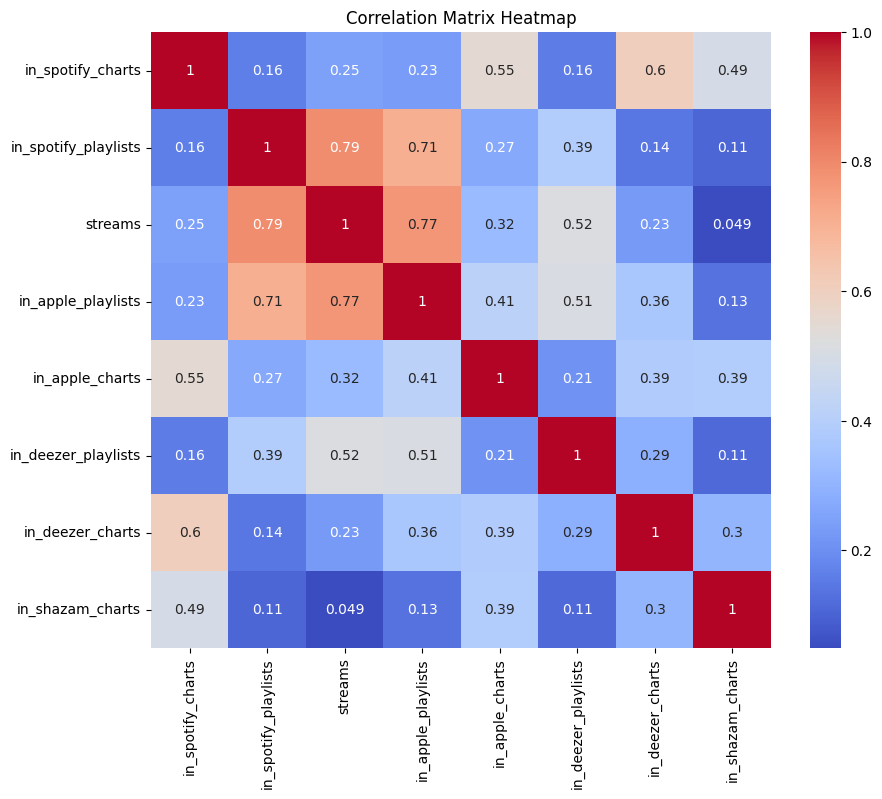

In [37]:
mat_col =['in_spotify_charts', 'in_spotify_playlists','streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts']

corr_mat = numerical_spotify_df[mat_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [38]:
rank_columns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
numerical_spotify_df[rank_columns] = -numerical_spotify_df[rank_columns]
numerical_spotify_df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist_prime_product,key_encoded,mode_encoded
921,1,2022,10,17,430,-6,1.707096e+08,14,-116,9.000000,...,0.65,0.91,0.04,0.0,0.48,0.18,552,0.094048,4.0,0
130,1,2023,5,15,451,-33,9.627375e+07,10,-126,7.000000,...,0.69,0.83,0.03,0.0,0.27,0.05,622,0.094048,4.0,0
582,2,2022,1,7,807,0,6.068094e+07,3,0,5.000000,...,0.29,0.73,0.00,0.0,0.07,0.07,933,2.149497,1.0,1
584,2,2020,7,24,12854,0,1.699402e+09,237,-27,636.000000,...,0.76,0.72,0.22,0.0,0.27,0.04,511,2.363009,7.0,0
658,1,2002,1,1,30427,-7,1.202723e+09,235,-106,109.859609,...,0.79,0.71,0.26,0.0,0.07,0.37,362,1.142787,6.0,0


In [39]:
X = numerical_spotify_df[['in_spotify_charts', 'in_spotify_playlists',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts']]
y = numerical_spotify_df['streams']

In [40]:
X.isnull().sum()

,0
in_spotify_charts,0
in_spotify_playlists,0
in_apple_playlists,0
in_apple_charts,0
in_deezer_playlists,0
in_deezer_charts,0
in_shazam_charts,0


In [41]:
print(X.dtypes)

in_spotify_charts         int64
in_spotify_playlists      int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
dtype: object


In [42]:
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Extract coefficients
coefficients = model.coef_
features = X.columns

# Normalize coefficients to sum to 1
total_weight = sum(abs(coefficients))  # Use absolute values to normalize
normalized_weights = [abs(coef) / total_weight for coef in coefficients]

# Display normalized weights
print("Normalized Weights:")
for feature, weight in zip(features, normalized_weights):
    print(f"{feature}: {weight:.2f}")

Normalized Weights:
in_spotify_charts: 0.13
in_spotify_playlists: 0.33
in_apple_playlists: 0.27
in_apple_charts: 0.01
in_deezer_playlists: 0.11
in_deezer_charts: 0.06
in_shazam_charts: 0.09


In [43]:
# Step 1: Scaling
#scaler = MinMaxScaler()
scaler = StandardScaler()

# Columns to normalize
columns_to_scale = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'bpm',
                    'in_apple_playlists', 'in_apple_charts',
                    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

# Apply scaling directly (handles negative rankings naturally)
numerical_spotify_df[columns_to_scale] = scaler.fit_transform(numerical_spotify_df[columns_to_scale])

In [44]:
numerical_spotify_df[['in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts']]

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
921,-0.604245,0.309872,-0.605513,-0.623894,-1.262798,-0.588262,0.441827,0.326692
130,-0.601590,-1.067838,-0.736678,-0.670215,-1.460253,-0.599927,0.441827,-0.791852
582,-0.556585,0.616029,-0.799397,-0.751277,1.027685,-0.611592,0.441827,0.416502
584,0.966371,0.616029,2.088231,1.958510,0.494555,3.068706,0.441827,0.000000
658,3.187913,0.258845,1.213020,1.935349,-1.065343,0.000000,0.275616,0.130743
...,...,...,...,...,...,...,...,...
870,-0.587178,0.616029,-0.631793,-0.716536,0.000916,-0.576597,0.441827,0.416502
333,-0.580857,0.513977,-0.700861,-0.531252,-0.591450,-0.594095,0.441827,0.343021
265,-0.598935,0.513977,-0.723482,-0.786018,1.027685,-0.605760,0.441827,0.416502
280,-0.451532,0.105766,-0.541506,-0.786018,1.027685,-0.518272,0.441827,0.416502


In [45]:
numerical_spotify_df['raw_popularity_score'] = (
    0.13 * 0.75 * numerical_spotify_df['in_spotify_charts'] +
    0.33 * 0.75 * numerical_spotify_df['in_spotify_playlists'] +
    0.27 * 0.75 * numerical_spotify_df['in_apple_playlists'] +
    0.01 * 0.75 * numerical_spotify_df['in_apple_charts'] +
    0.11 * 0.75 * numerical_spotify_df['in_deezer_playlists'] +
    0.06 * 0.75 * numerical_spotify_df['in_deezer_charts'] +
    0.09 * 0.75 * numerical_spotify_df['in_shazam_charts'] +
    0.25 * numerical_spotify_df['streams']
)
#numerical_spotify_df['popularity_score'] = (numerical_spotify_df['raw_popularity_score'] / numerical_spotify_df['raw_popularity_score'].max()) * 100
#convert raw_popularity score to positive
min_score = numerical_spotify_df['raw_popularity_score'].min()
if min_score < 0:
    numerical_spotify_df['raw_popularity_score'] = numerical_spotify_df['raw_popularity_score'] - min_score
#make popularity score in the scale of 0 to 100
numerical_spotify_df['popularity_score'] = ((numerical_spotify_df['raw_popularity_score'] / numerical_spotify_df['raw_popularity_score'].max()) * 100).round()

In [46]:
numerical_spotify_df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_encoded,artist_prime_product,key_encoded,mode_encoded,raw_popularity_score,popularity_score
921,1,2022,10,17,-0.604245,0.309872,-0.605513,-0.623894,-1.262798,-0.588262,...,0.04,0.0,0.48,0.18,552,0.094048,4.0,0,1.170944,23.0
130,1,2023,5,15,-0.601590,-1.067838,-0.736678,-0.670215,-1.460253,-0.599927,...,0.03,0.0,0.27,0.05,622,0.094048,4.0,0,0.917159,18.0
582,2,2022,1,7,-0.556585,0.616029,-0.799397,-0.751277,1.027685,-0.611592,...,0.00,0.0,0.07,0.07,933,2.149497,1.0,1,1.159641,22.0
584,2,2020,7,24,0.966371,0.616029,2.088231,1.958510,0.494555,3.068706,...,0.22,0.0,0.27,0.04,511,2.363009,7.0,0,3.078723,59.0
658,1,2002,1,1,3.187913,0.258845,1.213020,1.935349,-1.065343,0.000000,...,0.26,0.0,0.07,0.37,362,1.142787,6.0,0,3.106715,60.0


In [47]:
# drop 'released_year', 'released_month', 'released_day', 'track_name_encoded','artist_prime_product', 'key_encoded', 'mode_encoded', 'raw_popularity_score'
df_without_releasetime_track_artist = numerical_spotify_df.drop(columns=['released_year', 'released_month', 'released_day', 'track_name_encoded','artist_prime_product', 'key_encoded', 'mode_encoded', 'raw_popularity_score'])

In [48]:
df_without_releasetime_track_artist

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,popularity_score
921,1,-0.604245,0.309872,-0.605513,-0.623894,-1.262798,-0.588262,0.441827,0.326692,0.482523,0.73,0.65,0.91,0.04,0.0,0.48,0.18,23.0
130,1,-0.601590,-1.067838,-0.736678,-0.670215,-1.460253,-0.599927,0.441827,-0.791852,0.268486,0.82,0.69,0.83,0.03,0.0,0.27,0.05,18.0
582,2,-0.556585,0.616029,-0.799397,-0.751277,1.027685,-0.611592,0.441827,0.416502,0.910596,0.68,0.29,0.73,0.00,0.0,0.07,0.07,22.0
584,2,0.966371,0.616029,2.088231,1.958510,0.494555,3.068706,0.441827,0.000000,-1.122750,0.70,0.76,0.72,0.22,0.0,0.27,0.04,59.0
658,1,3.187913,0.258845,1.213020,1.935349,-1.065343,0.000000,0.275616,0.130743,-1.158423,0.90,0.79,0.71,0.26,0.0,0.07,0.37,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,1,-0.587178,0.616029,-0.631793,-0.716536,0.000916,-0.576597,0.441827,0.416502,-0.908714,0.78,0.31,0.72,0.01,0.0,0.11,0.04,23.0
333,2,-0.580857,0.513977,-0.700861,-0.531252,-0.591450,-0.594095,0.441827,0.343021,-1.015732,0.68,0.81,0.82,0.53,0.0,0.09,0.13,23.0
265,1,-0.598935,0.513977,-0.723482,-0.786018,1.027685,-0.605760,0.441827,0.416502,0.767905,0.74,0.75,0.73,0.42,0.0,0.09,0.04,22.0
280,3,-0.451532,0.105766,-0.541506,-0.786018,1.027685,-0.518272,0.441827,0.416502,0.268486,0.69,0.36,0.90,0.01,0.1,0.15,0.04,23.0


Feed-Forward Neural Network